06/22/20: I want to analyze at the covariance of the band limited GPs we generated using the DFT matrix. I want to derive the kernel of the GP from which we are sampling our weights from. 

In [6]:
import numpy as np
from estimator import bp_weights_dft
import matplotlib.pyplot as plt

We will derive the kernel for our band limited GP features. Our random features are:
$$w(t) = Re \bigg(\sum_{j=0}^{N-1} \sqrt{\lambda_j} G_j e^{\dfrac{i 2  \pi jt }{N}}\bigg) ; \; \; G_j \sim N(0, 1)$$

Then, the kernel for our GPs are:
$$k(t, t') = \mathbb{E}[w(t)^T w(t')] =  \sum_{j=0}^{N-1} \lambda_j \cos{\dfrac{i 2 \pi j (t-t')}{N}} $$
$$ \lambda_j = \begin{cases} 1 & a \leq b \\ 0 & otherwise \end{cases}$$

In [7]:
# covariance for bandpass GP weights
N = 100
j = np.arange(0, N -1, 1)
lamda = np.zeros_like(j)
lamda[2:4] = 1
kernel = np.zeros((N, N), dtype=np.complex)
for m in range(N):
    for n in range(N):
        kernel[m, n] = np.sum(lamda * np.cos(2 * np.pi * j * (m - n) / N))
#         kernel[m, n] = np.sum(lamda * np.exp(1j * 2 * np.pi * j * (m - n) / N))

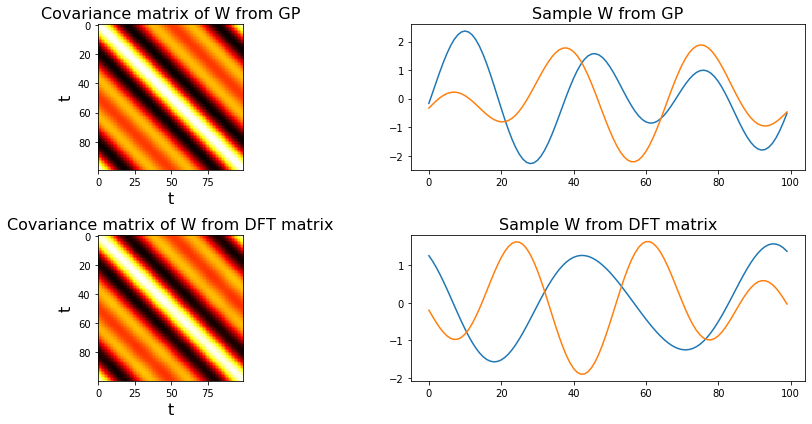

In [8]:
fig = plt.figure(figsize=(12, 6))
# plt.suptitle('Random features from a GP')
ax = fig.add_subplot(221)
ax.set_title('Covariance matrix of W from GP', fontsize=16)
plt.imshow(kernel.real, cmap='hot')
plt.xlabel('t', fontsize=16)
plt.ylabel('t', fontsize=16)
# plt.colorbar()

W = np.random.multivariate_normal(np.zeros(N), kernel.real, 10)
ax = fig.add_subplot(222)
ax.set_title('Sample W from GP', fontsize=16)
plt.plot(W[0])
plt.plot(W[1])


# generate the covariance matrix using dft matrix
W = bp_weights_dft(5000, 100, 2, 4).T
ax = fig.add_subplot(224)
ax.set_title('Sample W from DFT matrix', fontsize=16)
plt.plot(W[0])
plt.plot(W[1])


ax = fig.add_subplot(223)
ax.set_title('Covariance matrix of W from DFT matrix', fontsize=16)
plt.imshow(W.T @ W, cmap='hot')
# plt.colorbar()
plt.xlabel('t', fontsize=16)
plt.ylabel('t', fontsize=16)
plt.tight_layout()
plt.savefig('figures/covariance_comparison.png')